In [10]:
"""
LSTM prediction of POD mode time coeffs from JHTB
Isotropic turbulence in box
Arvind Mohan
"""

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# f = h5py.File('iso64PODcoeffs.mat','r') 
# data = f.get('aPOD') 
# data = np.array(data) 



In [6]:
# Convert to real numbers
numModes= 6
domCoeffs = data[0:numModes,:].astype(complex).real

In [18]:
domCoeffs.shape
dataLength= np.size(domCoeffs,1)
np.save('podMode1.npy',domCoeffs[0,:])

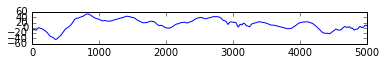

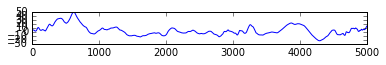

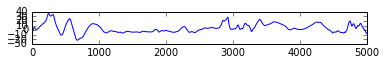

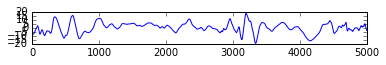

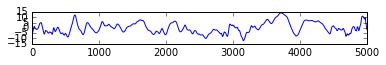

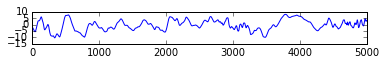

In [8]:
for i in range(numModes):
    plt.subplot(numModes,1,i+1)
    plt.plot(domCoeffs[i,:])
    plt.show()

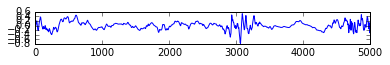

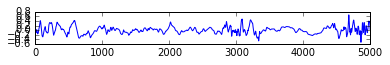

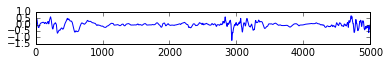

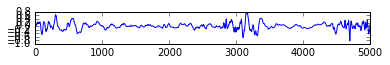

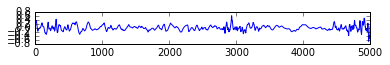

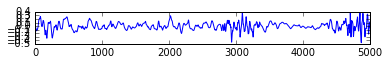

In [9]:
# Detrending to make series stationary
data=np.zeros((numModes,dataLength-1))
for i in range(1,dataLength):
    data[:,i-1]= domCoeffs[:,i] - domCoeffs[:,i-1]
    

for i in range(numModes):
    plt.subplot(numModes,1,i+1)
    plt.plot(data[i,:])
    plt.show()

In [17]:
# scaling data with sklearn for LSTM tanh -1,1 range
#verify transformations are accurate
signal= data[0,:]
print(signal[:5])
signal= signal.reshape(len(signal), 1)
scaler= MinMaxScaler(feature_range=(-1, 1))
scaler= scaler.fit(signal)
scaled_signal= scaler.transform(signal)
scaled_signal.shape
print(scaled_signal[:5])
#invert transform
inverted_signal= scaler.inverse_transform(scaled_signal)
print(inverted_signal[:5])

# zero mean and unit variance
# data_normalized = np.zeros((numModes,dataLength-1))

# for i in range(numModes):
#     plt.subplot(numModes,1,i+1)
#     sig = domCoeffs[i,:]
#     temp = (sig - np.mean(sig))/np.std(sig)
#     domCoeffs_normalized[i,:] = temp
#     plt.plot(temp)
#     plt.show()

[ 0.03942214  0.02408819  0.01038022  0.00230651  0.00245111]
[[ 0.26370693]
 [ 0.24035082]
 [ 0.21947133]
 [ 0.20717375]
 [ 0.207394  ]]
[[ 0.03942214]
 [ 0.02408819]
 [ 0.01038022]
 [ 0.00230651]
 [ 0.00245111]]


In [ ]:
# Demarcate training and test data


In [ ]:
# form difference series
a = np.array([1.,5.,3.,7.,11.,24.])
b=[]
for i in range(1,a.size):
    temp= a[i] - a[i-1]
    b.append(temp)
b

In [ ]:
a = domCoeffs.shape

In [ ]:
np.size(domCoeffs,0)